<a href="https://colab.research.google.com/github/furu-tuan-dong/CS112.L11.KHTN/blob/master/Week5/ReportExcersiseWeek5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">CS112.L11.KHTN</h2>


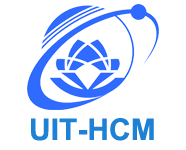
<h2 align="center">Nhóm N002 - Phân tích và thiết kế thuật toán - Design and Analysic of Algorithms</h2>



| <h3>  Họ và tên  |   <h3>    MSSV       |  <h3>Vai trò  |
| :------------:|:-------------:|:-----:|
| <h3>Nguyễn Phúc Đạt | <h3>18520573  | <h3> Trưởng nhóm    |
| <h3>Đồng Quốc Tuấn  | <h3>18520185  | <h3>Thành viên |
| <h3>Huỳnh Minh Trí  | <h3>18520176  | <h3>Thành viên |


#***Bài tập 1***: Khóa số
Để tăng độ an toàn chống hiện tượng cướp ngân hàng ngày càng phổ biến người ta dùng khóa số với mã mở khóa đơn giản nhưng rất hiệu quả. Trên cửa ra vào hiển thị một xâu khá dài các ký tự số. Các chữ số có thể di chuyển đổi chổ cho nhau hoặc bị xóa. Muốn mở khóa người ta phải di chuyển các chữ số và trong trường hợp cần thiết – xóa vài chữ số để nhận được xâu lớn nhất thỏa mãn điều kiện đã cài đặt. Điều kiện này được thay đổi thường xuyên. Hôm nay điều kiện đó là “Số nhận được phải chia hết cho 3”. Số nhận được có thể bắt đầu bằng các chữ số 0. Xâu “000” sẽ lớn hơn xâu “00”.

Hãy xác định khóa mở cửa.

Dữ liệu: Vào từ thiết bị nhập chuẩn gồm một xâu ký tự số có độ dài lớn hơn 2 và không vượt quá 105.

Kết quả: Đưa ra thiết bị xuất chuẩn xâu khóa mở cửa.

Ví dụ:

|Input|Output|
| :------------:|:-------------:|
| 105| 510|


##***1.Abstraction***
Cho xâu kí tự số $s$, đổi chỗ hoặc xóa các kí tự trong $s$ để được chuỗi mới lớn nhất chia hết cho 3 

##***2.Pattern Recognition***
- Nếu s chia hết cho 3 => trả về s

- Nếu s không chia hết cho 3, số dư là m:
    - Xóa x sao cho x nhỏ nhất và chia cho 3 dư m
    - Nếu không có những số này, ta tìm 2 số x, y nhỏ nhất thỏa:
        - Nếu số dư là 1, x%3 = 2 và y%3 = 2
        - Nếu số dư là 2, x%3 = 1 và y%3 = 1
    - Xóa x, y khỏi s
- Kết quả là chuỗi s đã được sắp xếp theo thứ tự giảm dần

Ví dụ: 
 - $s = 123456$ chia hết cho $3$ => sắp xếp $s$ giảm dần => kết quả = $654321$
 - $s = 1234567$ chia $3$ dư $1$ => xóa $1$ => sắp xếp $s$ giảm dần => kết quả = $765432$
 - $s = 35678$ chia $3$ dư $2$ => không có $2$ trong s =>  xóa $8$ vì $8$ nhỏ nhất và chia cho 3 dư 2 => sắp xếp s giảm dần => kết quả = 7653
 - $s = 9671$ chia $3$ dư $2$ => không có số nào chia $3$ dư $2$ trong $s$ => xóa $1$ và $6$ vì cả 2 nhỏ nhất và chia $3$ dư $1$ => sắp xếp $s$ giảm dần => kết quả = $96$


##***3.Algorithm Design***
```
if s modulo 3 != 0:
    mod = s modulo 3
    if mod in s:
        remove mod from s
    else:
        find x, y such that x + y = (mod*2) modulo 3
        remove x, y from s
sort s decending
return s

```



##***4.Programming***


In [ ]:
def find_index_divisible_x(arr, x):
    if str(x) in arr:
        return arr.index(str(x))
    elif str(x + 3) in arr:
        return arr.index(str(x + 3))
    elif str(x + 6) in arr:
        return arr.index(str(x + 6))
    else:
        return -1

def find_2_index_divisible_x(arr, x):
    index_1 = find_index_divisible_x(arr, x)
    index_2 = find_index_divisible_x(arr[index_1+1:], x) + index_1 + 1
    return index_1, index_2

if __name__ == "__main__":
    s = input()
    int_s = int(s)
    list_s = list(s)
    list_s.sort()
    if int_s % 3 == 0:
        list_s.reverse()
        print(''.join(list_s))
        exit()
    else:
        mod = int(int_s % 3)
        index = find_index_divisible_x(list_s, mod)
        if index == -1:
            x, y = find_2_index_divisible_x(list_s, (mod * 2) % 3)
            if x != -1 and y != -1:
                list_s.remove(list_s[x])
                list_s.remove(list_s[y - 1])
                list_s.reverse()

                if len(list_s) == 1:
                    print(str(list_s[0]))
                else:
                    print(''.join(list_s))
        else:
            list_s.remove(list_s[index])
            list_s.reverse()
            print(''.join(list_s))

9671
96


##***5. Kết quả Wecode***
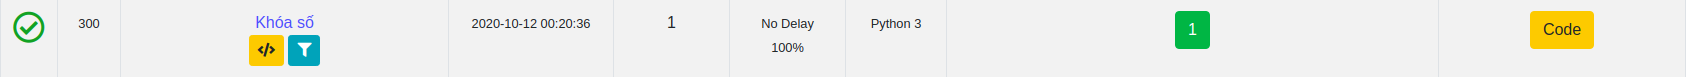
